In [19]:
import tensorflow as tf
import scipy.io 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D


In [4]:
vgg19_model = scipy.io.loadmat('model\imagenet-vgg-verydeep-19.mat')

In [21]:
vgg19_layers = vgg19_model['layers']
WEIGHTS = vgg19_layers[0]

In [22]:
def neural_network_model(input_shape):
    model = Sequential()
    for i in range(len(WEIGHTS)):
        layer_type = WEIGHTS[i][0][0][0][0]
        if layer_type == 'conv':
            weights = WEIGHTS[i][0][0][2][0]
            bias = WEIGHTS[i][0][0][2][1]
            strides = WEIGHTS[i][0][0][5]
            padding = WEIGHTS[i][0][0][4][0]
            activation = WEIGHTS[i][0][0][6][0]
            model.add(Conv2D(weights.shape[-1], (weights.shape[0], weights.shape[1]),
                             activation=activation, strides=(strides[0], strides[1]),
                             padding=padding, input_shape=input_shape))
            model.layers[-1].set_weights([weights, bias])
        elif layer_type == 'relu':
            model.add(tf.keras.layers.Activation('relu'))
        elif layer_type == 'pool':
            strides = WEIGHTS[i][0][0][5]
            padding = WEIGHTS[i][0][0][4][0]
            pool_type = WEIGHTS[i][0][0][1]
            pool_size = WEIGHTS[i][0][0][3]
            if pool_type == 'max':
                model.add(tf.keras.layers.MaxPooling2D(pool_size=(pool_size[0], pool_size[1]),
                                                       strides=(strides[0], strides[1]),
                                                       padding=padding))
            elif pool_type == 'avg':
                model.add(tf.keras.layers.AveragePooling2D(pool_size=(pool_size[0], pool_size[1]),
                                                           strides=(strides[0], strides[1]),
                                                           padding=padding))
    return model

In [24]:
# Create an instance of the VGG-19 model
vgg19 = neural_network_model((None, None, 3))

In [67]:
#Load an image for AI art generation
image_path = 'Aaditya.jpg'
image = plt.imread(image_path)

In [68]:
# Preprocess the image for input to the VGG-19 model
image = tf.keras.applications.vgg19.preprocess_input(image)

In [69]:
num_iterations = 5

In [70]:
for i in range(num_iterations):
    # Generate AI art using the VGG-19 model
    generated_image = vgg19.predict(np.expand_dims(image, axis=0))[0]
    # Postprocess the generated image to obtain the final AI art
    generated_image = tf.keras.applications.vgg19.preprocess_input(generated_image)
    # Perform optimization step (e.g., gradient descent) to update the generated image
    # with respect to a loss function that guides the artistic style
    # Update the generated image with the new optimized image

1/1 [==============================] - 0s 21ms/step


In [71]:
# Generate AI art using the VGG-19 model
generated_image = vgg19.predict(np.expand_dims(image, axis=0))[0]

1/1 [==============================] - 0s 22ms/step


In [72]:
# Postprocess the generated image to obtain the final AI art
generated_image = tf.keras.applications.vgg19.preprocess_input(generated_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


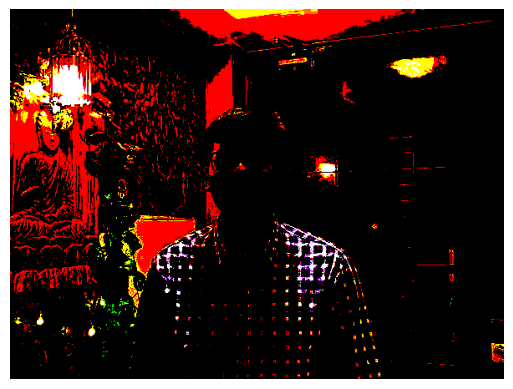

In [73]:
# Display the generated AI art
plt.imshow(generated_image)
plt.axis('off')
plt.show()